In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/home/gpetrini/.local/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


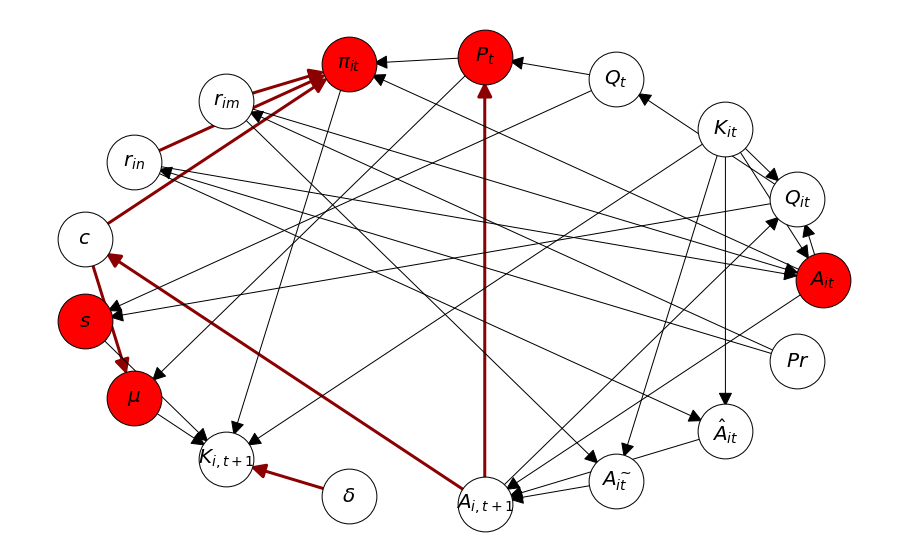

In [5]:
fig, ax = plt.subplots(figsize=(16, 10))

G = nx.DiGraph()
G.add_edges_from(
    [
        ("$A_{it}$", "$Q_{it}$"), ("$K_{it}$", "$Q_{it}$"),  # Eq 1
        ("$Q_{it}$", "$Q_{t}$"),  # Eq 2a
        ("$Q_{t}$", "$P_{t}$"),  # Eq 2b
        ("$P_{t}$", "$\pi_{it}$"), ("$A_{it}$", "$\pi_{it}$"),
        ("$r_{im}$", "$\pi_{it}$"), ("$r_{in}$", "$\pi_{it}$"),
        ("$c$", "$\pi_{it}$"),  # Eq 3
        ("$Q_{it}$", "$s$"), ("$Q_{t}$", "$s$"),
        ("$r_{in}$", "$A_{it}$"), ("$r_{im}$",
                                   "$A_{it}$"), ("$K_{it}$", "$A_{it}$"),
        ("$\mu$", "$K_{i,t+1}$"), ("$s$", "$K_{i,t+1}$"),
        ("$\pi_{it}$", "$K_{i,t+1}$"), ("$\delta$", "$K_{i,t+1}$"),
        ("$K_{it}$", "$K_{i,t+1}$"),  # Eq 7
        ("$P_{t}$", "$\mu$"), ("$A_{i,t+1}$", "$c$"), ("$c$", "$\mu$"),
        ("$A_{it}$", "$A_{i,t+1}$"), ("$A^{\sim}_{it}$",
                                      "$A_{i,t+1}$"), ("$\hat{A}_{it}$", "$A_{i,t+1}$"),
        ("$A_{i,t+1}$", "$Q_{it}$"),
        ("$r_{im}$", "$A^{\sim}_{it}$"), ("$r_{in}$", "$\hat{A}_{it}$"),
        ("$K_{it}$", "$A^{\sim}_{it}$"), ("$K_{it}$", "$\hat{A}_{it}$"),
        ("$K_{it}$", "$A^{\sim}_{it}$"), ("$Pr$", "$r_{in}$"),  ("$Pr$", "$r_{im}$"),
    ])


# Specify the edges you want here
red_edges = [
    ("$c$", "$\pi_{it}$"), ("$c$", "$\mu$"), 
    ("$A_{i,t+1}$", "$c$"), ("$A_{i,t+1}$", "$P_{t}$"), 
    ("$r_{in}$", "$\pi_{it}$"),
    ("$r_{im}$", "$\pi_{it}$"),
    ("$\delta$", "$K_{i,t+1}$")
]
edge_colours = ['black' if not edge in red_edges else 'red'
                for edge in G.edges()]
black_edges = [edge for edge in G.edges() if edge not in red_edges]

highlights = ["$A_{it}$", "$P_{t}$", "$s$", "$\pi_{it}$", "$\mu$"]
red_nodes = [node for node in G.nodes() if node in highlights]
white_nodes = [node for node in G.nodes() if node not in highlights]


# Need to create a layout when doing
# separate calls to draw nodes and edges
pos = nx.shell_layout(G,)
nx.draw_networkx_nodes(G, pos, node_size=3000, ax=ax, node_color='white', edgecolors='black',
                       nodelist=white_nodes
                       )
nx.draw_networkx_nodes(G, pos, node_size=3000, ax=ax, node_color='red', edgecolors='black',
                       nodelist=red_nodes)
nx.draw_networkx_labels(G, pos, font_size=20)
nx.draw_networkx_edges(G, pos, edgelist=red_edges, edge_color='darkred', arrows=True,
                       arrowsize=30, min_target_margin=25, width=3.0)
nx.draw_networkx_edges(G, pos, edgelist=black_edges, arrows=True,
                       arrowsize=30, min_target_margin=25, )


sns.despine(left=True, bottom=True)
fig.savefig("modelo.eps", transparent=True, dpi=600,
            bbox_inches='tight', pad_inches=0
            )
plt.show()